# Logistic Regression:
Logistic regression is basically a supervised classification algorithm. In a classification problem, the target variable(or output), y, can take only discrete values for given set of features(or inputs), X.

## Binomial Logistic Regression:
Binomial logistic regression assume binomial distribution of the response.

### Logistic Regression implementation in the Python:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def normalize(X):
	'''
	function to normalize feature matrix, X
	'''
	mins = np.min(X, axis = 0)
	maxs = np.max(X, axis = 0)
	rng = maxs - mins
	norm_X = 1 - ((maxs - X)/rng)
	return norm_X


def logistic_func(beta, X):
	'''
	logistic(sigmoid) function
	'''
	return 1.0/(1 + np.exp(-np.dot(X, beta.T)))


def log_gradient(beta, X, y):
	'''
	logistic gradient function
	'''
	first_calc = logistic_func(beta, X) - y.reshape(X.shape[0], -1)
	final_calc = np.dot(first_calc.T, X)
	return final_calc


def cost_func(beta, X, y):
	'''
	cost function, J
	'''
	log_func_v = logistic_func(beta, X)
	y = np.squeeze(y)
	step1 = y * np.log(log_func_v)
	step2 = (1 - y) * np.log(1 - log_func_v)
	final = -step1 - step2
	return np.mean(final)


def grad_desc(X, y, beta, lr=.01, converge_change=.001):
	'''
	gradient descent function
	'''
	cost = cost_func(beta, X, y)
	change_cost = 1
	num_iter = 1
	
	while(change_cost > converge_change):
		old_cost = cost
		beta = beta - (lr * log_gradient(beta, X, y))
		cost = cost_func(beta, X, y)
		change_cost = old_cost - cost
		num_iter += 1
	
	return beta, num_iter


def pred_values(beta, X):
	'''
	function to predict labels
	'''
	pred_prob = logistic_func(beta, X)
	pred_value = np.where(pred_prob >= .5, 1, 0)
	return np.squeeze(pred_value)

### Example: To predict wether a flower is iris-verginica or not.

In [2]:
from sklearn import datasets

# loading iris dataset
iris = datasets.load_iris()

# loading features and lables
X = iris['data']
y = (iris['target'] == 2).astype(np.int32)

# normalizing feature matrix
X = normalize(X)
  
# stacking columns wth all ones in feature matrix
X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X))

# initial beta values
beta = np.matrix(np.zeros(X.shape[1]))

# beta values after running gradient descent
beta, num_iter = grad_desc(X, y, beta)

# estimated beta values and number of iterations
print("Estimated regression coefficients:", beta)
print("No. of iterations:", num_iter)

# predicted labels
y_pred = pred_values(beta, X)
  
# number of correctly predicted labels
print("Correctly predicted labels:", np.sum(y == y_pred))

Estimated regression coefficients: [[-17.88574815  -1.50809947  -6.14373993  13.73097488  18.32932664]]
No. of iterations: 3227
Correctly predicted labels: 146


### Plotting decision boundary:

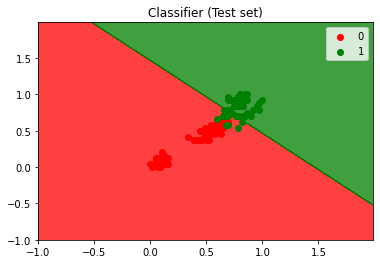

In [3]:
from matplotlib.colors import ListedColormap

X_set, y_set = X[:, 1:], y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

X3, X4 = np.meshgrid(np.arange(start = X_set[:, 2].min() - 1, stop = X_set[:, 2].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 3].min() - 1, stop = X_set[:, 3].max() + 1, step = 0.01))

_X = np.array([X1.ravel(), X2.ravel(), X3.ravel(), X4.ravel()])
_X = np.vstack((np.matrix(np.ones(_X.shape[1])), _X))
y_pred = pred_values(beta, _X.T)

plt.contourf(X3, X4, y_pred.reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(np.squeeze(np.array(X_set[y_set == j, 2])), np.squeeze(np.array(X_set[y_set == j, 3])), color = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Classifier (Test set)')
plt.legend()
plt.show()

### Logistic Regression code in the Python Sklearn:

In [4]:
from sklearn.linear_model import LogisticRegression

# loading iris dataset
iris = datasets.load_iris()

# loading features and lables
X = normalize(iris['data'])
y = (iris['target'] == 2).astype(np.int32)

# train a logistic regression classifier
clf = LogisticRegression()
clf.fit(X, y)

# estimated beta values and number of iterations
print("Estimated regression coefficients:\n", clf.coef_)
print("No. of iterations:", clf.n_iter_)

# predicted labels
y_pred = clf.predict(X)

# number of correctly predicted labels
print("Correctly predicted labels:", np.sum(y == y_pred))

# solver used by logistic regression
print("Solver used:", clf.solver)

Estimated regression coefficients:
 [[1.29706259 0.01000304 2.72609678 3.67383094]]
No. of iterations: [16]
Correctly predicted labels: 145
Solver used: lbfgs


### Plotting decision boundary:

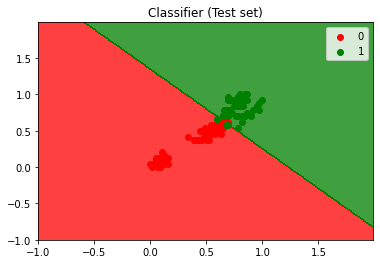

In [5]:
from matplotlib.colors import ListedColormap

X_set, y_set = X, y

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

X3, X4 = np.meshgrid(np.arange(start = X_set[:, 2].min() - 1, stop = X_set[:, 2].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 3].min() - 1, stop = X_set[:, 3].max() + 1, step = 0.01))

plt.contourf(X3, X4, clf.predict(np.array([X1.ravel(), X2.ravel(), X3.ravel(), X4.ravel()]).T).reshape(
             X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 2], X_set[y_set == j, 3], color = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Classifier (Test set)')
plt.legend()
plt.show()

## Multinomial Logistic Regression:
In Multinomial Logistic Regression, the output variable can have more than two possible discrete outputs.

### Example: Train a logistic regression classsifier to predict the type of a flower.

In [6]:
# loading iris dataset
iris = datasets.load_iris()

# loading features and lables
X = normalize(iris['data'])
y = iris['target']

# train a logistic regression classifier
clf = LogisticRegression()
clf.fit(X, y)

# estimated beta values and number of iterations
print("Estimated regression coefficients:\n", clf.coef_)
print("No. of iterations:", clf.n_iter_)

# predicted labels
y_pred = clf.predict(X)

# number of correctly predicted labels
print("Correctly predicted labels:", np.sum(y == y_pred))

# solver used by logistic regression
print("Solver used:", clf.solver)

Estimated regression coefficients:
 [[-1.40492627  1.56002082 -2.86063347 -2.78713597]
 [ 0.26135757 -1.43723031  0.41839556 -0.47843834]
 [ 1.1435687  -0.12279052  2.44223791  3.2655743 ]]
No. of iterations: [26]
Correctly predicted labels: 141
Solver used: lbfgs


### Testing the classifier:

In [7]:
y_pred = clf.predict([[5.9, 3.0, 5.1, 1.8]])
print("Iris-Setosa" if y_pred == [0] else "Iris-Versicolour" if y_pred == [1] else "Iris-Virginica")

Iris-Virginica


### Plotting decision boundary:

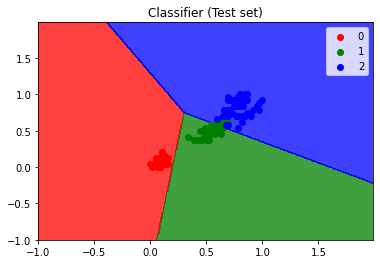

In [8]:
from matplotlib.colors import ListedColormap

X_set, y_set = X, y

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

X3, X4 = np.meshgrid(np.arange(start = X_set[:, 2].min() - 1, stop = X_set[:, 2].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 3].min() - 1, stop = X_set[:, 3].max() + 1, step = 0.01))

plt.contourf(X3, X4, clf.predict(np.array([X1.ravel(), X2.ravel(), X3.ravel(), X4.ravel()]).T).reshape(
             X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 2], X_set[y_set == j, 3], color = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
plt.title('Classifier (Test set)')
plt.legend()
plt.show()